In [148]:
import warnings
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np

# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

### Data augmentation for the class which was less than 3% of total class

In [401]:
import os
import shutil
import glob
import random
import numpy as np
import os,glob
from os import listdir,makedirs
from os.path import isfile,join
import matplotlib.pyplot as plt
from skimage import io
from skimage.morphology import disk
from os import listdir,makedirs
from os.path import isfile,join
import matplotlib.pyplot as plt
from skimage import io
import cv2 
import numpy as np
import albumentations as A

In [165]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('F:/Data/simpsons/simpsons1/9. krusty_the_clown/pic_0079_aug.jpg')  # this is a PIL image
img1=load_img('F:/Data/simpsons/simpsons1/9. krusty_the_clown/pic_0077_blur.jpg')
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
y = img_to_array(img1)  # this is a Numpy array with shape (3, 150, 150)
y = y.reshape((1,) + y.shape)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='F:/Data/simpsons/simpsons1/9. krusty_the_clown', save_prefix='cat', save_format='jpg'):
    i += 1
    if i > 35:
        break  # otherwise the generator would loop indefinitely
i = 0
for batch in datagen.flow(y, batch_size=1,
                          save_to_dir='F:/Data/simpsons/simpsons1/9. krusty_the_clown', save_prefix='second', save_format='jpg'):
    i += 1
    if i > 35:
        break  # otherwise the generator would loop indefinitely

### Testing for applying range of blur

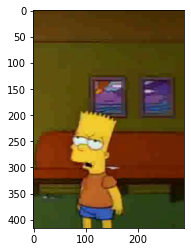

In [264]:
img1=plt.imread("F:/Data/simpsons/2. bart_simpson/pic_0001.jpg")
plt.imshow(img1)

In [294]:
import albumentations as A
aug = A.Blur(blur_limit=50,always_apply=True,p=0.5)

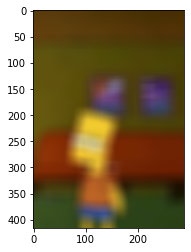

In [295]:
image = aug(image=img1)['image']
plt.imshow(image)

### For better prediction I have used range of blur applied to all the classes. It was observed without range of blur accuracy was approx 11% in VGG16

In [328]:
import random
from random import randint
import albumentations as A
from albumentations import Blur
folderList = ['0. apu_nahasapeemapetilon', '1. barney_gumble','2. bart_simpson','3. charles_montgomery_burns',
              '4. homer_simpson','5. lisa_simpson','6. marge_simpson','7. maggie_simpson','8. ned_flanders',
              '9. krusty_the_clown']

for folder in folderList:
    path = 'F:/Data/simpsons/simpsons2/'+folder # Source Folder
    dstpath = 'F:/Data/simpsons/simpsons2/'+folder # Destination Folder
    list1=[]
    for i in range(50):
        r=random.randint(1,50)
        list1.append(r)#if r not in list1: list1.append(r)
    i=0
    print(len(list1))
    
    files = [f for f in listdir(path) if isfile(join(path,f))] 
    for image in files:
        try:
            i=i+1
            img = io.imread(os.path.join(path,image))
            if not os.path.join(path,image).endswith('blur.jpg'):
                aug = A.Blur(blur_limit=list1[i],always_apply=True,p=0.5)
                if i >= 48:
                    i=0
                new_img = aug(image=img)['image']
                dstPath = join(dstpath,image)
                io.imsave(dstPath,new_img)


        except Exception as ex: # work on python 3.x 
            #print('Failed to upload to ftp: '+ str(e))

            #print ("{} is not converted".format(image))
            template = "An exception of type {0} occurred. Arguments:\n{1!r}"
            message = template.format(type(ex).__name__, ex.args)
            print (message)

50
1
2
4
6
8
10
11
13
14
15
16
19
20
21
26
27
28
30
31
32
33
38
39
40
41
42
43
44
45
46
47
0
5
6
8
9
10
12
13
15
16
17
18
19
21
22
25
26
27
28
30
31
32
33
34
35
36
38
40
41
42
43
44
45
47
0
1
3
50
3
4
5
7
8
13
15
16
17
18
19
20
21
22
23
24
25
28
29
30
32
34
35
36
37
38
41
43
44
45
46
47
0
1
2
3
4
5
7
8
10
12
13
15
16
17
19
20
21
22
23
26
29
32
33
35
36
37
39
40
41
43
44
45
46
0
1
3
50
2
3
5
6
7
8
9
10
11
12
15
19
20
21
23
24
29
32
33
34
35
36
37
38
39
41
43
45
46
47
0
1
3
4
5
7
8
9
10
11
12
13
15
17
18
19
21
22
24
25
28
32
33
34
35
37
39
40
41
43
44
46
47
0
1
2
3
50
2
3
4
5
6
7
8
9
10
11
13
14
17
18
19
20
21
22
24
26
27
28
29
30
31
33
37
38
39
41
42
43
44
45
47
0
1
5
6
7
8
9
11
12
13
14
15
17
18
19
20
21
23
24
25
27
28
29
32
34
35
36
37
39
41
43
46
0
1
2
3
50
1
2
3
5
6
7
9
10
11
12
14
15
16
17
19
21
22
23
25
27
30
31
35
36
37
39
40
45
An exception of type IndexError occurred. Arguments:
('list index out of range',)
An exception of type IndexError occurred. Arguments:
('list index out o

In [329]:
CATEGORIES = ['0. apu_nahasapeemapetilon', '1. barney_gumble','2. bart_simpson','3. charles_montgomery_burns','4. homer_simpson','5. lisa_simpson','6. marge_simpson','7. maggie_simpson','8. ned_flanders','9. krusty_the_clown']

In [330]:
import cv2
import numpy as np
import keras
from keras_applications.imagenet_utils import _obtain_input_shape
from keras_squeezenet import SqueezeNet
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.layers import Activation, Dropout, Convolution2D, GlobalAveragePooling2D
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras import backend
import os

IMG_SAVE_PATH = 'F:/Data/simpsons/simpsons2'

CLASS_MAP = {
    "0. apu_nahasapeemapetilon": 0,
    "1. barney_gumble": 1,
    "2. bart_simpson": 2,
    "3. charles_montgomery_burns": 3,
    "4. homer_simpson": 4,
    "5. lisa_simpson": 5,
    "6. marge_simpson": 6 ,
    "7. maggie_simpson": 7,
    "8. ned_flanders": 8,
    "9. krusty_the_clown": 9
}

NUM_CLASSES = len(CLASS_MAP)


def mapper(val):
    return CLASS_MAP[val]

# load images from the directory
dataset1 = []
for directory in os.listdir(IMG_SAVE_PATH):
    path = os.path.join(IMG_SAVE_PATH, directory)
    if not os.path.isdir(path):
        continue
    for item in os.listdir(path):
        # to make sure no hidden files get in our way
        if item.startswith("."):
            continue
        img = cv2.imread(os.path.join(path, item))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))
        dataset1.append([img, directory])

data, labels = zip(*dataset1)
labels = list(map(mapper, labels))


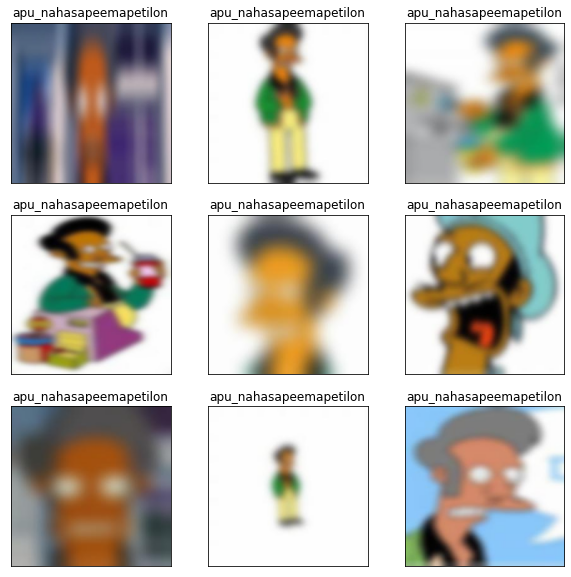

In [331]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(dataset1[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[labels[i]][3:])
plt.show()

In [332]:
import random
random.shuffle(dataset1)

In [333]:
# Normalizing the data
input_data = np.array(data)
print(input_data.shape)
label = np.array(labels)
input_data = input_data/255.0
input_data.shape

(1081, 224, 224, 3)


(1081, 224, 224, 3)

In [334]:
# one hot encoding
import keras
import keras.utils
from keras import utils as np_utils
label = keras.utils.to_categorical(label, num_classes=10,dtype='i1')

In [335]:
input_data.shape

(1081, 224, 224, 3)

In [336]:
label.shape

(1081, 10)

In [337]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=4)

In [338]:
X_train.shape

(756, 224, 224, 3)

In [339]:
y_train.shape

(756, 10)

In [340]:
import warnings
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np

# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [341]:
import matplotlib.pyplot as plt
from skimage import io
import cv2 
import numpy as np
from keras import applications


from skimage.filters.rank import entropy
from skimage.morphology import disk
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from keras.utils import to_categorical
from keras_applications import vgg16
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import os,glob
from os import listdir,makedirs

### VGG16

In [342]:
import os,glob
from glob import glob

# re-size all the images to this
IMAGE_SIZE = [224, 224]

#train_path = '/Users/Swati/MachineLearning/Paper/gray_without_watermark/'
#valid_path = '/Users/Swati/MachineLearning/Paper/Full/'

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

  
  # useful for getting number of classes

  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(10, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model

In [343]:
from keras.optimizers import Adam
opt = Adam
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [344]:
history = model.fit(X_train, y_train,
          batch_size = 32,
          epochs = 10,
          validation_data = (X_test, y_test))

Epoch 1/10
24/24 [==============================] - 103s 4s/step - loss: 2.4029 - accuracy: 0.2209 - val_loss: 2.0476 - val_accuracy: 0.2985
Epoch 2/10
24/24 [==============================] - 111s 5s/step - loss: 1.3918 - accuracy: 0.5966 - val_loss: 1.7252 - val_accuracy: 0.4092
Epoch 3/10
24/24 [==============================] - 112s 5s/step - loss: 1.0217 - accuracy: 0.7116 - val_loss: 1.6581 - val_accuracy: 0.4523
Epoch 4/10
24/24 [==============================] - 113s 5s/step - loss: 0.8018 - accuracy: 0.7923 - val_loss: 1.5676 - val_accuracy: 0.4769
Epoch 5/10
24/24 [==============================] - 116s 5s/step - loss: 0.6757 - accuracy: 0.8333 - val_loss: 1.4517 - val_accuracy: 0.5323
Epoch 6/10
24/24 [==============================] - 116s 5s/step - loss: 0.5678 - accuracy: 0.8730 - val_loss: 1.5141 - val_accuracy: 0.5292
Epoch 7/10
24/24 [==============================] - 115s 5s/step - loss: 0.5278 - accuracy: 0.8810 - val_loss: 1.4493 - val_accuracy: 0.5600
Epoch 8/10
24

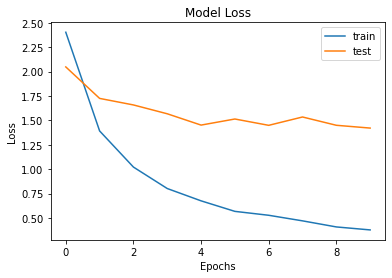

In [345]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [346]:
from keras.models import load_model


model.save('VGG16_res_final.h5')

### RESNET50

In [347]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [348]:
base_model = applications.resnet50.ResNet50(weights= None, include_top=False, input_shape= (224,224,3))

In [351]:
from keras.layers import Conv2D,MaxPool2D,GlobalAveragePooling2D,AveragePooling2D
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(10, activation= 'softmax')(x)
model1 = Model(inputs = base_model.input, outputs = predictions)

In [352]:
from keras.optimizers import Adam
opt = Adam
model1.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [353]:
history = model1.fit(X_train, y_train,
          batch_size = 32,
          epochs = 10,
          validation_data = (X_test, y_test))

Epoch 1/10
24/24 [==============================] - 279s 12s/step - loss: 3.4785 - accuracy: 0.1402 - val_loss: 2.3394 - val_accuracy: 0.0892
Epoch 2/10
24/24 [==============================] - 297s 12s/step - loss: 2.8142 - accuracy: 0.1944 - val_loss: 2.4270 - val_accuracy: 0.0800
Epoch 3/10
24/24 [==============================] - 302s 13s/step - loss: 2.7143 - accuracy: 0.2077 - val_loss: 6.0199 - val_accuracy: 0.1138
Epoch 4/10
24/24 [==============================] - 283s 12s/step - loss: 2.7556 - accuracy: 0.2249 - val_loss: 4.6571 - val_accuracy: 0.1169
Epoch 5/10
24/24 [==============================] - 293s 12s/step - loss: 2.3526 - accuracy: 0.3161 - val_loss: 4.3081 - val_accuracy: 0.0831
Epoch 6/10
24/24 [==============================] - 329s 14s/step - loss: 2.3244 - accuracy: 0.3148 - val_loss: 3.2139 - val_accuracy: 0.0985
Epoch 7/10
24/24 [==============================] - 300s 12s/step - loss: 2.1245 - accuracy: 0.3492 - val_loss: 2.8008 - val_accuracy: 0.1046
Epoch 

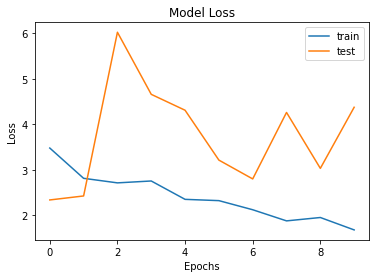

In [354]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

## VGG16 performed better than RESNET50 therefore we are taking VGG16 h5 file for prediction

# Testing with validation data

In [403]:
to_be_moved = random.sample(glob.glob("F:/Data/simpsons/validation/*.jpg"),5)
for f in enumerate(to_be_moved, 1):
    dest = os.path.join("F:/Data/simpsons/validation")
    #os.rename(f[1],f[1]) #Adding randomly selected images as blur

    if not os.path.exists(dest):
        os.makedirs(dest)


path = 'F:/Data/simpsons/validation' # Source Folder
dstpath = 'F:/Data/simpsons/validation' # Destination Folder
try:
    makedirs(dstpath)
except:
    print ("Directory already exist, images will be written in same folder")
files = [f for f in listdir(path) if isfile(join(path,f))] 
for image in files:
    try:
        img = io.imread(os.path.join(path,image))
        new_img = cv2.GaussianBlur(img, (37, 37), 0) #Applying blur only to randomly selected images as mentioned above
        dstPath = join(dstpath,image)
        io.imsave(dstPath,new_img)

    except Exception as e: 
        print ("{} is not converted".format(image))

Directory already exist, images will be written in same folder


Label: 0. apu_nahasapeemapetilon


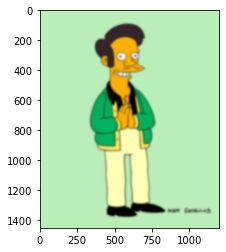

In [407]:
import numpy as np
import cv2
from cv2 import imread
import warnings
warnings.filterwarnings('ignore')
import warnings
warnings.warn('my warning')
model = load_model('VGG16_res_final.h5')


img1=plt.imread("F:/Data/simpsons/validation/apu1.jpg")
plt.imshow(img1)
x = np.asarray(imread("F:/Data/simpsons/validation/apu1.jpg"))
#x = load_img(file, target_size=(img_width,img_height))
#x = img_to_array(x)
x.resize(224,224,3)
x = np.expand_dims(x, axis=0)
array = model.predict(x)
result = array[0]
answer = np.argmax(result)
if answer == 0:
    print("Label: 0. apu_nahasapeemapetilon")
elif answer == 1:
    print("Label: 1. barney_gumble")
elif answer == 2:
    print("Label: 2. bart_simpson")
elif answer == 3:
    print("Label: 3. charles_montgomery_burns")
elif answer == 4:
    print("Label: 4. homer_simpson")
elif answer == 5:
    print("Label: 5. lisa_simpson")
elif answer == 6:
    print("Label: 6. marge_simpson")
elif answer == 7:
    print("Label: 7. maggie_simpson")
elif answer == 8:
    print("Label: 8. ned_flanders")
elif answer == 9:
    print("Label: 9. krusty_the_clown")

Label: 4. homer_simpson


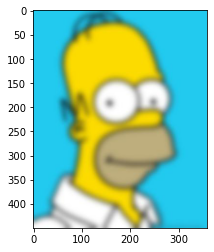

In [409]:
img1=plt.imread("F:/Data/simpsons/validation/homer2.jpg")
plt.imshow(img1)
x = np.asarray(imread("F:/Data/simpsons/validation/homer2.jpg"))
#x = load_img(file, target_size=(img_width,img_height))
#x = img_to_array(x)
x.resize(224,224,3)
x = np.expand_dims(x, axis=0)
array = model.predict(x)
result = array[0]
answer = np.argmax(result)
if answer == 0:
    print("Label: 0. apu_nahasapeemapetilon")
elif answer == 1:
    print("Label: 1. barney_gumble")
elif answer == 2:
    print("Label: 2. bart_simpson")
elif answer == 3:
    print("Label: 3. charles_montgomery_burns")
elif answer == 4:
    print("Label: 4. homer_simpson")
elif answer == 5:
    print("Label: 5. lisa_simpson")
elif answer == 6:
    print("Label: 6. marge_simpson")
elif answer == 7:
    print("Label: 7. maggie_simpson")
elif answer == 8:
    print("Label: 8. ned_flanders")
elif answer == 9:
    print("Label: 9. krusty_the_clown")

Label: 9. krusty_the_clown


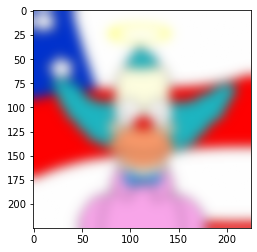

In [412]:
# Krusty the clown was rare category class

img1=plt.imread("F:/Data/simpsons/validation/clown3.png")
plt.imshow(img1)
x = np.asarray(imread("F:/Data/simpsons/validation/clown3.png"))
#x = load_img(file, target_size=(img_width,img_height))
#x = img_to_array(x)
x.resize(224,224,3)
x = np.expand_dims(x, axis=0)
array = model.predict(x)
result = array[0]
answer = np.argmax(result)
if answer == 0:
    print("Label: 0. apu_nahasapeemapetilon")
elif answer == 1:
    print("Label: 1. barney_gumble")
elif answer == 2:
    print("Label: 2. bart_simpson")
elif answer == 3:
    print("Label: 3. charles_montgomery_burns")
elif answer == 4:
    print("Label: 4. homer_simpson")
elif answer == 5:
    print("Label: 5. lisa_simpson")
elif answer == 6:
    print("Label: 6. marge_simpson")
elif answer == 7:
    print("Label: 7. maggie_simpson")
elif answer == 8:
    print("Label: 8. ned_flanders")
elif answer == 9:
    print("Label: 9. krusty_the_clown")

Label: 4. homer_simpson


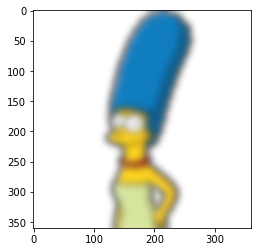

In [413]:
img1=plt.imread("F:/Data/simpsons/validation/marge1.png")
plt.imshow(img1)
x = np.asarray(imread("F:/Data/simpsons/validation/marge1.png"))
#x = load_img(file, target_size=(img_width,img_height))
#x = img_to_array(x)
x.resize(224,224,3)
x = np.expand_dims(x, axis=0)
array = model.predict(x)
result = array[0]
answer = np.argmax(result)
if answer == 0:
    print("Label: 0. apu_nahasapeemapetilon")
elif answer == 1:
    print("Label: 1. barney_gumble")
elif answer == 2:
    print("Label: 2. bart_simpson")
elif answer == 3:
    print("Label: 3. charles_montgomery_burns")
elif answer == 4:
    print("Label: 4. homer_simpson")
elif answer == 5:
    print("Label: 5. lisa_simpson")
elif answer == 6:
    print("Label: 6. marge_simpson")
elif answer == 7:
    print("Label: 7. maggie_simpson")
elif answer == 8:
    print("Label: 8. ned_flanders")
elif answer == 9:
    print("Label: 9. krusty_the_clown")

Label: 7. maggie_simpson


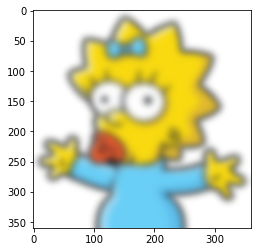

In [417]:
img1=plt.imread("F:/Data/simpsons/validation/maggie1.png")
plt.imshow(img1)
x = np.asarray(imread("F:/Data/simpsons/validation/maggie1.png"))
#x = load_img(file, target_size=(img_width,img_height))
#x = img_to_array(x)
x.resize(224,224,3)
x = np.expand_dims(x, axis=0)
array = model.predict(x)
result = array[0]
answer = np.argmax(result)
if answer == 0:
    print("Label: 0. apu_nahasapeemapetilon")
elif answer == 1:
    print("Label: 1. barney_gumble")
elif answer == 2:
    print("Label: 2. bart_simpson")
elif answer == 3:
    print("Label: 3. charles_montgomery_burns")
elif answer == 4:
    print("Label: 4. homer_simpson")
elif answer == 5:
    print("Label: 5. lisa_simpson")
elif answer == 6:
    print("Label: 6. marge_simpson")
elif answer == 7:
    print("Label: 7. maggie_simpson")
elif answer == 8:
    print("Label: 8. ned_flanders")
elif answer == 9:
    print("Label: 9. krusty_the_clown")

# Conclusion

### 1. Our VGG16 model has done quite a good prediction but not perfectly. I have used just 1038 images for 10 classes for just 10 epochs. If better computational power we can get better results as these datasets have approximately 10k images for 10 classes.
### 2. Our model has drastically improved after applying range of blur in all classes.
### 3. Model was able to detect rare category class too but has performed moderate for frequent class